In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:

stock_data = pd.read_excel('/content/drive/MyDrive/IEOR4574:Project_1/online_retail_II.xlsx', sheet_name = ['Year 2009-2010','Year 2010-2011'])
stock_data_1 = stock_data.get('Year 2009-2010')
stock_data_2 = stock_data.get('Year 2010-2011')

groupby Description

In [ ]:
stock_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
stock_data_1.Description = stock_data_1.Description.astype('string')

In [ ]:
stock_data_2.Description = stock_data_2.Description.astype('string')

In [ ]:
stock_data_1 = stock_data_1.sort_values(['Description','InvoiceDate'])

In [ ]:
stock_data_2 = stock_data_2.sort_values(['Description','InvoiceDate'])

In [ ]:
stock_data_1['total_amount'] = stock_data_1['Quantity'] * stock_data_1['Price']

In [ ]:
stock_data_2['total_amount'] = stock_data_2['Quantity'] * stock_data_2['Price']

In [ ]:
stock_data_1['InvoiceDate'] = pd.to_datetime(stock_data_1['InvoiceDate']).dt.date

In [ ]:
stock_data_2['InvoiceDate'] = pd.to_datetime(stock_data_2['InvoiceDate']).dt.date
stock_data_2['InvoiceDate'] = pd.to_datetime(stock_data_2['InvoiceDate'])

In [ ]:
stock_data_1['InvoiceDate'] = pd.to_datetime(stock_data_1['InvoiceDate'])

In [ ]:
c = stock_data_1['InvoiceDate'].dt.isocalendar()

In [ ]:
c1 = stock_data_2['InvoiceDate'].dt.isocalendar()

In [ ]:
b = pd.concat([stock_data_1, c], axis = 1)

In [ ]:
b1 = pd.concat([stock_data_2, c1], axis = 1)

In [ ]:
b = pd.concat([b,b1], axis = 0)

In [ ]:
b.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_amount,year,week,day
46771,493716,21955,DOORMAT UNION JACK GUNS AND ROSES,1,2010-01-05,6.75,17364.0,United Kingdom,6.75,2010,1,2
48455,493947,21955,DOORMAT UNION JACK GUNS AND ROSES,1,2010-01-08,6.75,17243.0,United Kingdom,6.75,2010,1,5
48644,493961,21955,DOORMAT UNION JACK GUNS AND ROSES,1,2010-01-08,6.75,17841.0,United Kingdom,6.75,2010,1,5
48901,493969,21955,DOORMAT UNION JACK GUNS AND ROSES,10,2010-01-08,5.95,14031.0,United Kingdom,59.50,2010,1,5
49256,493982,21955,DOORMAT UNION JACK GUNS AND ROSES,3,2010-01-10,6.75,18231.0,United Kingdom,20.25,2010,1,7


Only focusing on UK market sales data

In [ ]:
c = b[(b['Country'] == 'United Kingdom')]
c = c.drop_duplicates(keep='first')

In [ ]:
a = b.groupby(['Description','year','week']).sum().total_amount

In [ ]:
a.head()

Description                        year  week
DOORMAT UNION JACK GUNS AND ROSES  2010  1       100.00
                                         2       214.96
                                         3       369.03
                                         4       402.57
                                         5        20.25
Name: total_amount, dtype: float64

In [ ]:
a.index

MultiIndex([('  DOORMAT UNION JACK GUNS AND ROSES', 2010,  1),
            ('  DOORMAT UNION JACK GUNS AND ROSES', 2010,  2),
            ('  DOORMAT UNION JACK GUNS AND ROSES', 2010,  3),
            ('  DOORMAT UNION JACK GUNS AND ROSES', 2010,  4),
            ('  DOORMAT UNION JACK GUNS AND ROSES', 2010,  5),
            ('  DOORMAT UNION JACK GUNS AND ROSES', 2010,  8),
            ('  DOORMAT UNION JACK GUNS AND ROSES', 2010, 10),
            ('  DOORMAT UNION JACK GUNS AND ROSES', 2010, 11),
            ('  DOORMAT UNION JACK GUNS AND ROSES', 2010, 13),
            (          ' 3 STRIPEY MICE FELTCRAFT', 2009, 49),
            ...
            (                'wrongly coded 20713', 2011, 43),
            (                'wrongly coded 23343', 2011, 43),
            (                'wrongly coded-23343', 2011, 40),
            (                     'wrongly marked', 2011, 44),
            (               'wrongly marked 23343', 2011, 43),
            (        'wrongly marked ca

In [ ]:
a1 = a.unstack(level=0)

In [ ]:
x1 = 100000000000000000000000
str(a)
for i in a1.columns:
    if a1[i].isnull().sum() < x1:
        x1 = a1[i].isnull().sum()
        a = i
print(a)

60 TEATIME FAIRY CAKE CASES


<Axes: title={'center': '60 Teatime Fairy Cake Cases'}, xlabel='year,week'>

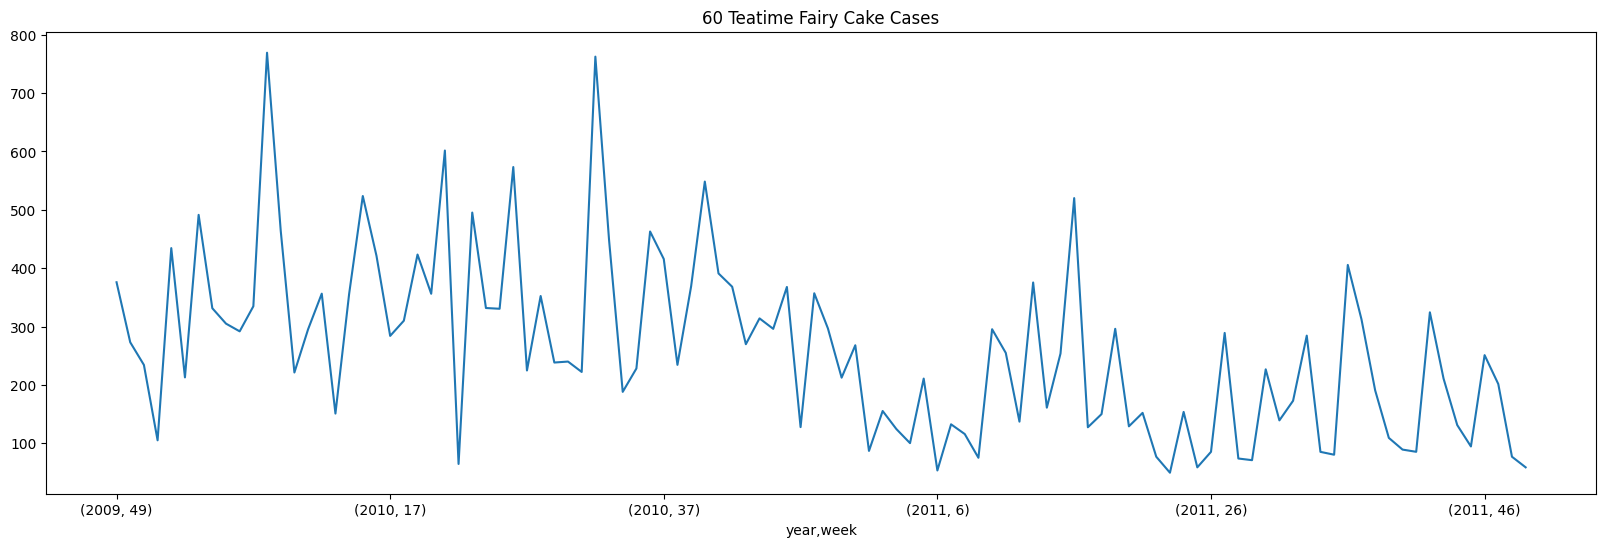

In [ ]:
plt.figure(figsize=(20,6))
a1['60 TEATIME FAIRY CAKE CASES'].plot(title = '60 Teatime Fairy Cake Cases')

<Axes: title={'center': ' PEACE WOODEN BLOCK LETTERS'}, xlabel='year,week'>

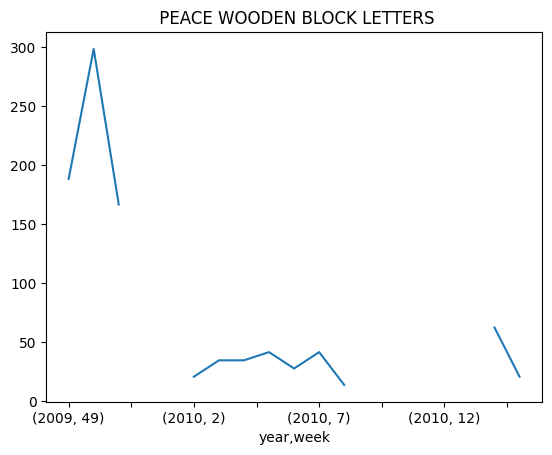

In [ ]:
a1[' PEACE WOODEN BLOCK LETTERS'].plot(title = ' PEACE WOODEN BLOCK LETTERS')

# Try cluster products into different buckets 
**Kmeans; other option: PCA, BERT(other transformer-related model)**

**Prune textual data**

In [ ]:
c.Description.describe(include = 'O')

count                                 944044
unique                                  5668
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    5528
Name: Description, dtype: object

In [ ]:
c = c[(c.Description != '')]

In [ ]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944044 entries, 46771 to 114538
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       944044 non-null  object        
 1   StockCode     944044 non-null  object        
 2   Description   944044 non-null  string        
 3   Quantity      944044 non-null  int64         
 4   InvoiceDate   944044 non-null  datetime64[ns]
 5   Price         944044 non-null  float64       
 6   Customer ID   716113 non-null  float64       
 7   Country       944044 non-null  object        
 8   total_amount  944044 non-null  float64       
 9   year          944044 non-null  UInt32        
 10  week          944044 non-null  UInt32        
 11  day           944044 non-null  UInt32        
dtypes: UInt32(3), datetime64[ns](1), float64(3), int64(1), object(3), string(1)
memory usage: 85.5+ MB


In [ ]:
def preprocess_text(text):
    import re
    #This utility function sanitizes a string by:
    #removing special characters
    #removing numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    return text

In [ ]:
c.Description = c.Description.apply(lambda x: preprocess_text(x))

In [ ]:
c = c[(c.Description != ' ')]

In [ ]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943941 entries, 46771 to 114538
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       943941 non-null  object        
 1   StockCode     943941 non-null  object        
 2   Description   943941 non-null  object        
 3   Quantity      943941 non-null  int64         
 4   InvoiceDate   943941 non-null  datetime64[ns]
 5   Price         943941 non-null  float64       
 6   Customer ID   716113 non-null  float64       
 7   Country       943941 non-null  object        
 8   total_amount  943941 non-null  float64       
 9   year          943941 non-null  UInt32        
 10  week          943941 non-null  UInt32        
 11  day           943941 non-null  UInt32        
 12  cluster       943941 non-null  int32         
dtypes: UInt32(3), datetime64[ns](1), float64(3), int32(1), int64(1), object(4)
memory usage: 121.4+ MB


**Transform textual data into numerical matrix**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(c['Description'])

In [ ]:
X.shape[0]

943941

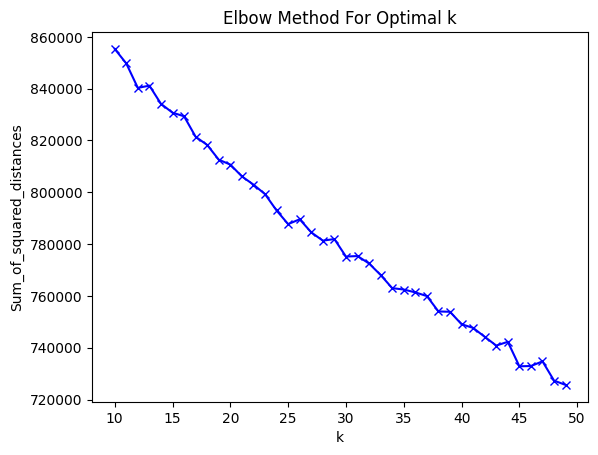

In [ ]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(10,50)
for k in K:
    km = KMeans(n_clusters=k, max_iter=2000, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=47, max_iter=2000, n_init=10)
km = km.fit(X)
x = km.transform(X)

In [ ]:
len(x)

943941

In [ ]:
def BIC(x,K):
    from sklearn import mixture
    BIC=[]
    for k in K:
        model=mixture.GaussianMixture(n_components=k, init_params='kmeans')
        model.fit(x)
        BIC.append(model.bic(x))
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(K,BIC,'-cx')
    plt.ylabel("BIC score")
    plt.xlabel("k")
    plt.title("BIC scoring for K-means")
    return(BIC)

[-369291368.80993277,
 -370417500.1646858,
 -371870044.34500945,
 -372894590.12374103,
 -373413094.325857,
 -373468099.5130137]

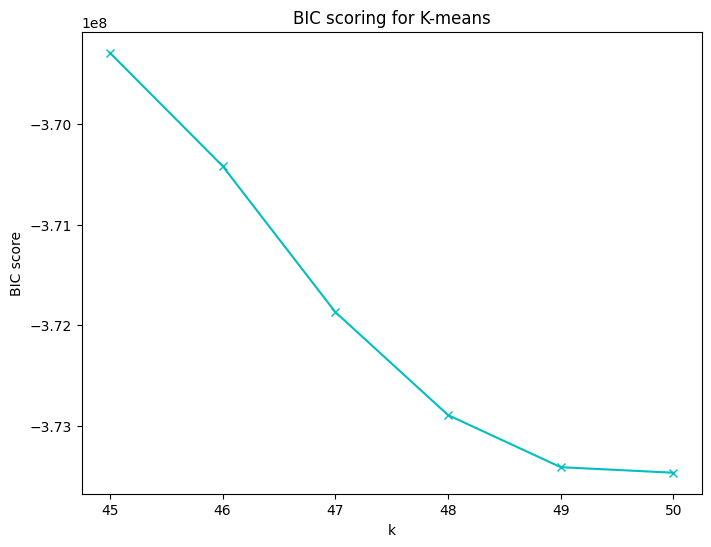

In [ ]:
BIC(x,range(45,51))

In [ ]:
clusters = km.labels_
c['cluster'] = clusters

In [ ]:
a = c.groupby(['cluster','InvoiceDate']).sum().total_amount

<Axes: title={'center': 'cluster 1'}, xlabel='InvoiceDate'>

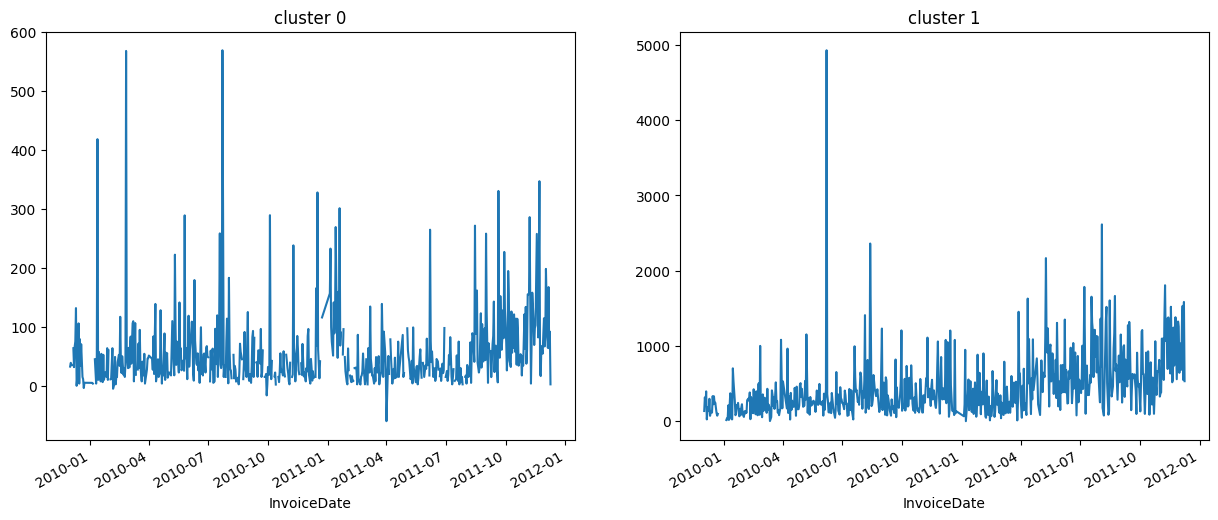

In [ ]:
a2 = a.unstack(level=0)
plt.figure(figsize=(15,6))
plt.subplot(121)
a2[0].plot(title='cluster 0')
plt.subplot(122)
a2[1].plot(title='cluster 1')

In [ ]:
a2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604 entries, 2009-12-01 to 2011-12-09
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       577 non-null    float64
 1   1       604 non-null    float64
 2   2       575 non-null    float64
 3   3       592 non-null    float64
 4   4       604 non-null    float64
 5   5       604 non-null    float64
 6   6       604 non-null    float64
 7   7       424 non-null    float64
 8   8       604 non-null    float64
 9   9       604 non-null    float64
 10  10      604 non-null    float64
 11  11      604 non-null    float64
 12  12      602 non-null    float64
 13  13      602 non-null    float64
 14  14      576 non-null    float64
 15  15      602 non-null    float64
 16  16      604 non-null    float64
 17  17      602 non-null    float64
 18  18      604 non-null    float64
 19  19      600 non-null    float64
 20  20      601 non-null    float64
 21  21      602 non-null

In [ ]:
a2[0]

InvoiceDate
2009-12-01    1158.77
2009-12-02    1228.87
2009-12-03     485.83
2009-12-04     514.85
2009-12-05      53.40
               ...   
2011-12-05     878.65
2011-12-06     807.24
2011-12-07     482.03
2011-12-08     941.10
2011-12-09     509.47
Name: 0, Length: 604, dtype: float64

# Dealing with missing data in time series

In [ ]:
from sklearn.ensemble import IsolationForest
a3 = []
for i in a2.columns:
    #dealing with outliers
    # x = a[i][(a[i]< a[i].quantile(0.998))]
    if 604 - len(a2[i]) < 100:
        a2[i] = a2[i].interpolate(option='linear')
    else:
        a2[i] = a2[i].interpolate(option='spline')
    a2[i] = a2[i].fillna(0.0)
    contamination = 3/len(a2[i])
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    results = pd.DataFrame(iso_forest.fit_predict(a2[i].values.reshape(-1,1)), columns = ['outlier'])
    x = pd.concat([a2[i].reset_index(),results], axis = 1)
    x.loc[x['outlier'] == -1, i] = np.nan
    x = x.drop(['outlier'], axis=1)
    x = x.squeeze()

    # if 604 - len(a2[i]) < 100:
    #     x = x.interpolate(option='linear')
    # else:
    #     x = x.interpolate(option='spline')
    # a2[i] = a2[i].dropna(axis=0)

    new = pd.DataFrame({'ds':x['InvoiceDate'], 'y':x[i]})
    new = new.fillna(0.0)

    a3.append(new)

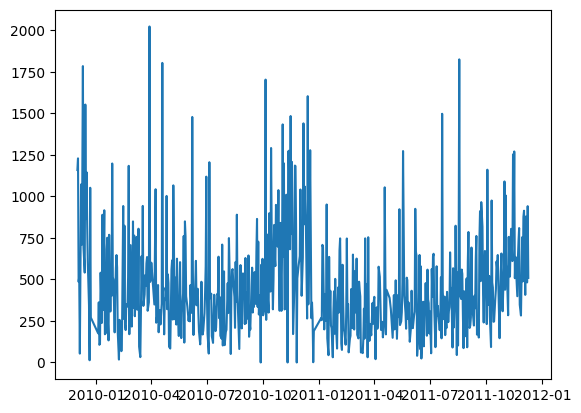

In [ ]:
plt.plot(a3[0].ds, a3[0].y)
#a2[0].plot(title='cluster 0')

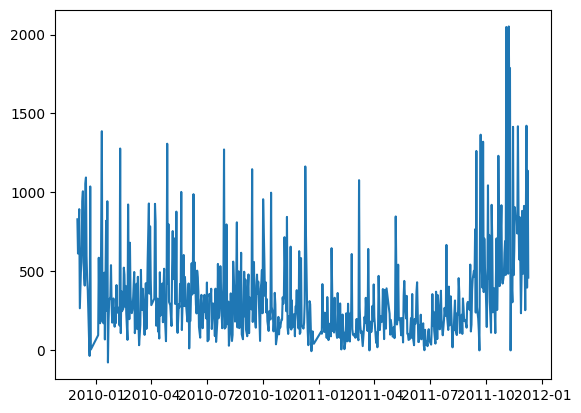

In [ ]:
plt.plot(a3[1].ds, a3[1].y)

# FacebookProphet

In [ ]:
#adding holidays to FP model
g = pd.DataFrame({'holiday':'Christmas','ds':pd.to_datetime(['2009-12-14','2009-12-15','2009-12-16','2009-12-17','2009-12-18','2009-12-19','2009-12-20', '2009-12-21','2009-12-22','2009-12-23','2010-12-14','2010-12-15','2010-12-16','2010-12-17','2010-12-18','2010-12-19','2010-12-20', '2010-12-21','2010-12-22','2010-12-23']), 'lower_window':0,'upper_window':1})
h = pd.DataFrame({'holiday':'New_Year','ds':pd.to_datetime(['2010-01-07','2010-01-08','2010-01-09','2010-01-10','2010-01-11','2011-01-07','2011-01-08','2011-01-09','2011-01-10','2011-01-11']), 'lower_window':0,'upper_window':1})
holiday = pd.concat((g,h))

In [ ]:
holiday

,holiday,ds,lower_window,upper_window
0,Christmas,2009-12-14,0,1
1,Christmas,2009-12-15,0,1
2,Christmas,2009-12-16,0,1
3,Christmas,2009-12-17,0,1
4,Christmas,2009-12-18,0,1
5,Christmas,2009-12-19,0,1
6,Christmas,2009-12-20,0,1
7,Christmas,2009-12-21,0,1
8,Christmas,2009-12-22,0,1
9,Christmas,2009-12-23,0,1


In [ ]:
from prophet import Prophet
from sklearn.model_selection import train_test_split
import itertools

In [ ]:
def fp(data, holidays):
    # model = Prophet(daily_seasonality=False,weekly_seasonality=True,
    #             yearly_seasonality=True,changepoint_prior_scale=0.05,changepoints=None,
    #             holidays=holidays, interval_width=0.95)
    # model.add_seasonality(name='monthly',period=30.5,fourier_order=3)
    train, valid, test = data[0:int(0.7*len(data))], data[int(0.7*len(data)): int(0.9*len(data))], data[int(0.9*len(data)):]
    # model.fit(train)
    # val_pred = model.predict(data[:int(0.9*len(data))])
    # MAPE = abs((valid-val_pred))/valid.mean()
    # train = pd.merge(train, val_pred[['ds','yhat','yhat_lower','yhat_upper']],how='left',on='ds')
    # valid = pd.merge(data[:int(0.9*len(data))], val_pred[['ds','yhat','yhat_lower','yhat_upper']],how='left',on='ds')
    '''
    hyperparameter tuning, using validation dataset 
    '''
    #Growth: logistic or linear
    #n_changepoints/ changepoint_range
    #changepoint_prior_scale goes down -> less flexibility on mimicing trends
    #specify the locations of the changepoints
    # m.add_seasonality(name='weekly',period=6,fourier_order=3)
    # 'holidays_prior_scale': [0.1, 1, 10] because not all products hinders by Christmas and New_Year
    # use default configuration of changepoint
    # monthly_seasonality -> false
    param_grid = {
        'changepoint_prior_scale': [0.01, 0.05, 0.1, 0.5],
        'seasonality_prior_scale': [0.05, 0.1, 0.5, 1, 10],
        'holidays_prior_scale': [1, 10],
        'daily_seasonality': [False],
        'weekly_seasonality': [True],
        'yearly_seasonality': [True],
        'changepoint_prior_scale':[0.05],
        'interval_width': [0.95]
    }
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    MAPE = []
    models = []
    for params in all_params:
        m = Prophet(**params, holidays = holidays)
        m.add_seasonality(name='weekly',period=6,fourier_order=3)
        m.add_seasonality(name='monthly', period =30.5, fourier_order = 5)
        m.fit(train)
        val_pred = m.predict(valid)
        mape = (abs((valid['y'] - val_pred['yhat']))/valid['y']).astype(float)
        mape = mape.replace([np.inf, -np.inf], 0)
        mape = mape.mean()
        MAPE.append(mape)
        models.append(m)
    MAPE = np.array(MAPE)
    tuning_results = pd.DataFrame(all_params)
    tuning_results['MAPE'] = MAPE
    best_params = all_params[np.argmin(MAPE)]
    best_model = Prophet(**best_params, holidays = holidays)
    best_model.fit(data)
    pred = best_model.predict(data)
    mape = (abs((data['y'] - pred['yhat']))/data['y']).astype(float)
    mape = mape.replace([np.inf, -np.inf], 0)
    mape = mape.mean()
    return mape, best_model #mape, best_model


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8m4w927a/41mpq50a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8m4w927a/1fsb5s7l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41171', 'data', 'file=/tmp/tmp8m4w927a/41mpq50a.json', 'init=/tmp/tmp8m4w927a/1fsb5s7l.json', 'output', 'file=/tmp/tmp8m4w927a/prophet_model_angh1hv/prophet_model-20230507205843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:58:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:58:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8m4w927a/gxu8lb6i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8m4w927a/f9i9a35b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

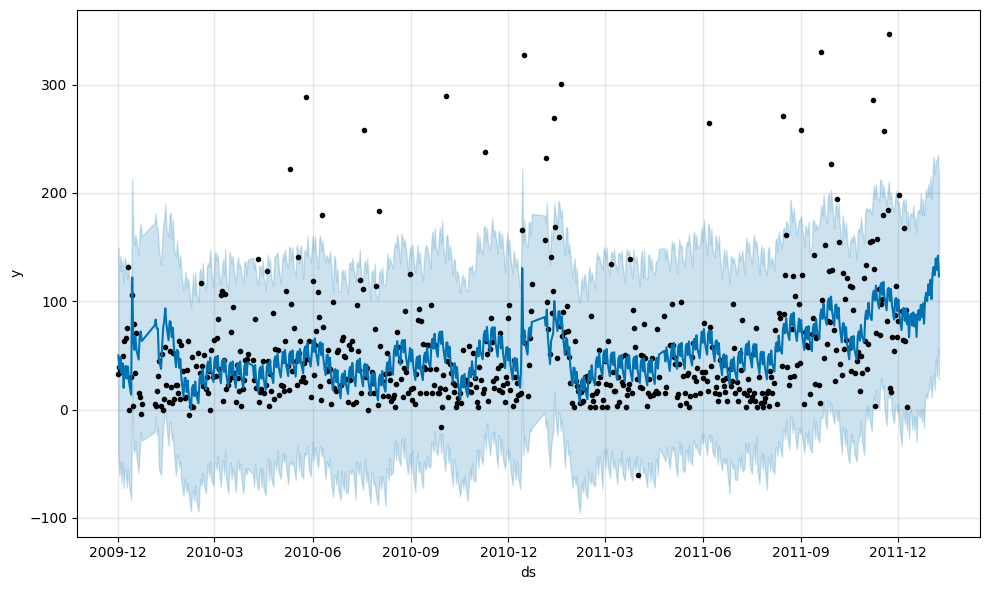

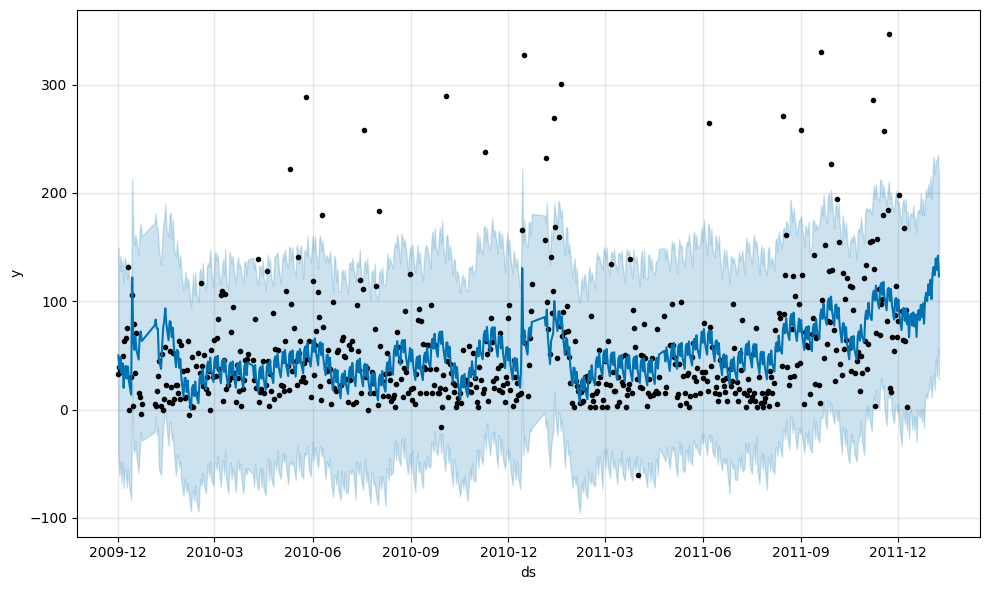

In [ ]:
m, model = fp(a3[0],holiday)
future = model.make_future_dataframe(periods = 30, freq = 'D')
future = model.predict(future)
model.plot(future)

In [ ]:
m

1.6933167234708935

In [ ]:
#calculate total MAPE
models =[]
MAPE = []
PRED = []
for i in a3:
    m, model = fp(i,holiday)
    MAPE.append(m)
    models.append(model)
    pred = model.predict(i)
    PRED.append(pred)



DEBUG:cmdstanpy:input tempfile: /tmp/tmp8m4w927a/oblytdsr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8m4w927a/8t2mt6gp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91520', 'data', 'file=/tmp/tmp8m4w927a/oblytdsr.json', 'init=/tmp/tmp8m4w927a/8t2mt6gp.json', 'output', 'file=/tmp/tmp8m4w927a/prophet_modelnyvfwm4k/prophet_model-20230507205848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:58:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:58:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8m4w927a/7foy0ojc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8m4w927a/y3iuuarz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
total = sum(MAPE)/len(MAPE)
total

1.4589423709169071

In [ ]:
#graphical demonstration of data, models' predictions
p = pd.concat(PRED, axis = 0)
p = p.fillna(0.0)
r = pd.concat(a3, axis = 0)
q = p.groupby(['ds']).sum()
s = r.groupby(['ds']).sum()

In [ ]:
p.columns.unique()

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas', 'Christmas_lower', 'Christmas_upper', 'New_Year',
       'New_Year_lower', 'New_Year_upper', 'additive_terms',
       'additive_terms_lower', 'additive_terms_upper', 'holidays',
       'holidays_lower', 'holidays_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

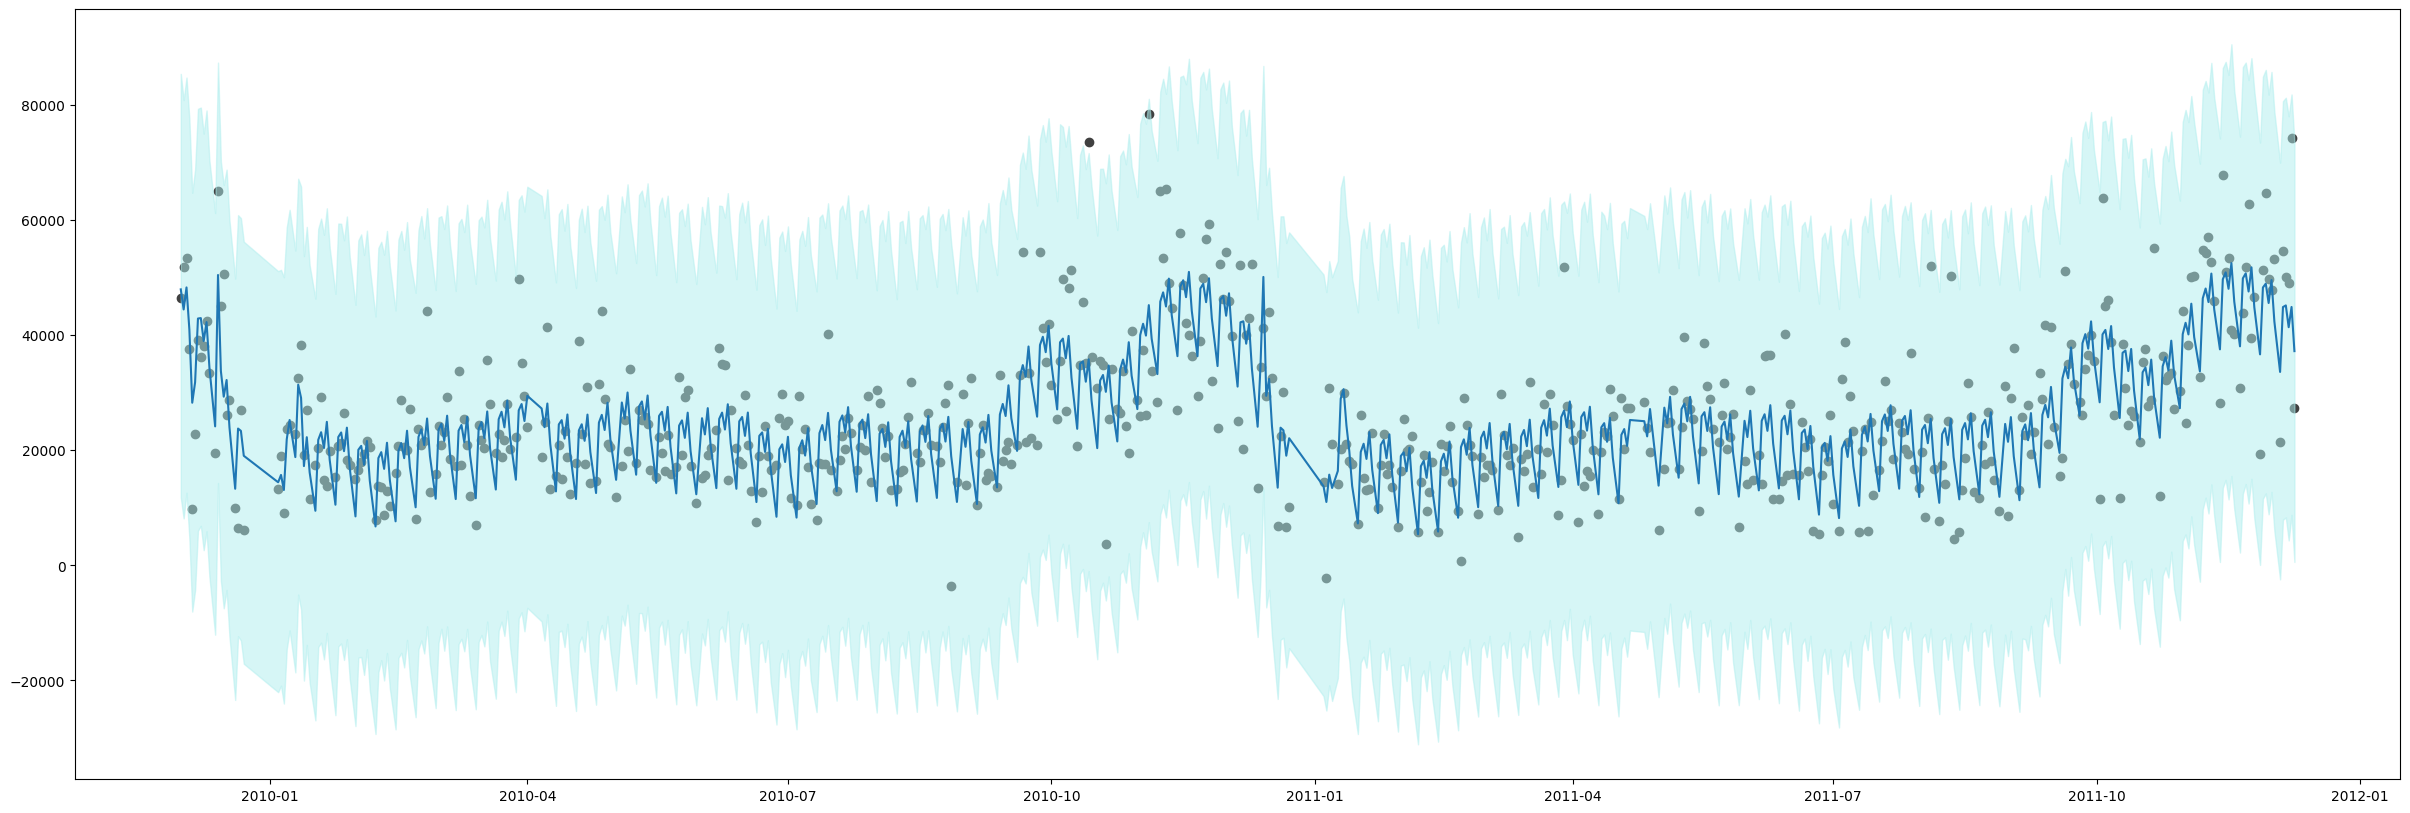

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(q.index, q.yhat)
plt.scatter(s.index, s.y, color='0.25')
plt.fill_between(q.index, q.yhat_lower, q.yhat_upper, color='paleturquoise', alpha=.5)
plt.show()

# 100% MAPE. Super inaccurate. How to improve???

In [ ]:
#Growth: logistic or linear
#n_changepoints/ changepoint_range
#changepoint_prior_scale goes down -> less flexibility on mimicing trends
#specify the locations of the changepoints
# m.add_seasonality(name='weekly',period=6,fourier_order=3)
# 'holidays_prior_scale': [0.1, 1, 10] because not all products hinders by Christmas and New_Year
# use default configuration of changepoint
# monthly_seasonality -> false

# Random Forest Regression


In [ ]:
#inherent data from previous FP model and use its prediction as inputs of RF model 
#though previous model is not accurate, however, RF leverages irrevelant info efficiently
#therefore, still apply FP's predictions
a4=[]
for i in a2.columns:
    a4.append(pd.concat([a3[i], PRED[i].yhat], axis = 1))

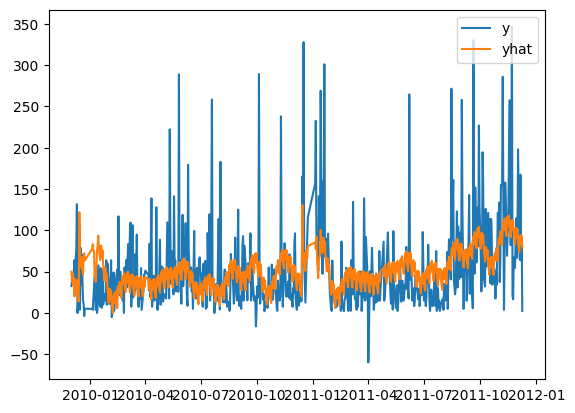

In [ ]:
plt.plot(a4[0].ds, a4[0].y, label = 'y')
plt.plot(a4[0].ds, a4[0].yhat, label = 'yhat')
plt.legend(loc="upper right")

# Each category's seasonality, trend check!!!

<Figure size 2000x700 with 0 Axes>

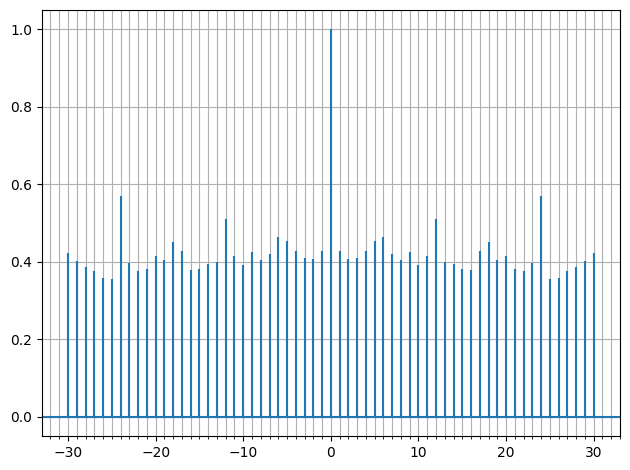

In [ ]:
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acovf
from matplotlib.ticker import FormatStrFormatter
import datetime as dt
from scipy import signal
from scipy.fft import fft, ifft
from matplotlib.ticker import AutoMinorLocator
import math
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
import statsmodels.api as sm
plt.figure(figsize=(20, 7))
fig, ax = plt.subplots()
ax.acorr(a2[30], maxlags = 30)
minor_locator = AutoMinorLocator(10)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
# plt.legend(['$R_X$(\u03C4)'],loc='upper left')
# plt.xlabel('\u03C4')
# plt.ylabel('Power')
ax.grid(True, which='both')
plt.tight_layout()
fig.show()

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

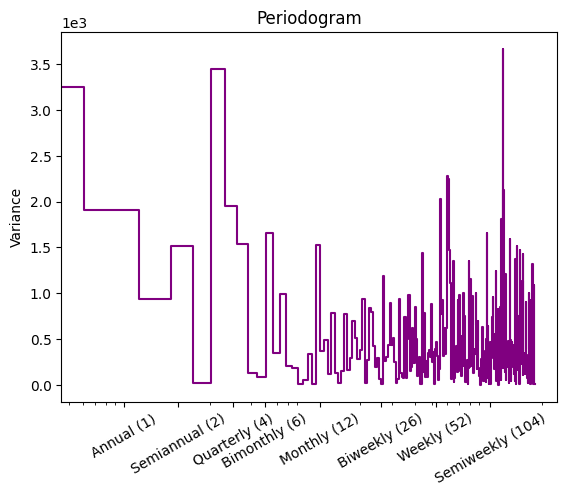

In [ ]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax
plot_periodogram(a2[1])

**follow the same logic of SARIMAX, feature engineering for each category before fit data to regressor**

In [ ]:
#adding lags, seasonalities and holidays
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
a5=[]

g = pd.DataFrame({'ds':pd.to_datetime(['2009-12-14','2009-12-15','2009-12-16','2009-12-17','2009-12-18','2009-12-19','2009-12-20', '2009-12-21','2009-12-22','2009-12-23','2010-12-14','2010-12-15','2010-12-16','2010-12-17','2010-12-18','2010-12-19','2010-12-20', '2010-12-21','2010-12-22','2010-12-23']), 'Holidays description': 'Pre-Christmas'})
h = pd.DataFrame({'ds':pd.to_datetime(['2010-01-07','2010-01-08','2010-01-09','2010-01-10','2010-01-11','2011-01-07','2011-01-08','2011-01-09','2011-01-10','2011-01-11']), 'Holidays description': 'Post New Year'})
holiday = pd.concat([g,h], ignore_index=True)
holiday.set_index('ds', inplace = True)
holiday = holiday.sort_index()
holiday.index = holiday.index.to_period("D")
holiday = pd.get_dummies(holiday)
for i in a4:
    for j in range(1, 8):
          i["lag_{}".format(j)] = i.y.shift(j)
    fourier = CalendarFourier(freq="A", order=18)
    dp = DeterministicProcess(
    index= pd.DatetimeIndex(i.ds).to_period(freq='D'),
    constant=True,               # dummy feature for bias (y-intercept)
    order=3,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
    )
    i.ds = i.ds.dt.to_period("D")
    i.set_index('ds', inplace = True)
    X = i.join(holiday, on = 'ds').fillna(0.0)
    X = pd.concat([X,dp.in_sample()], axis = 1)
    X.index = X.index.astype('datetime64[ns]')
    X = pd.concat([X, X.index.astype('datetime64[ns]').isocalendar()], axis = 1)
    X = X.groupby(['year', 'week']).sum()
    X.drop(columns = 'day', inplace = True)
    a5.append(X)

In [ ]:
a5[0]

y        yhat   lag_1   lag_2    lag_3    lag_4   lag_5  \
year week                                                                 
2009 49    255.82  232.597931  192.07  142.73   107.80    71.51   32.54   
     50    334.91  187.522727  368.66  418.00   321.23   282.23  254.88   
     51    307.80  412.430584  322.80  252.32   350.27   346.54  409.11   
     52     12.64  203.410501   22.50   96.73   119.23   183.25  116.52   
2010 1     106.25  394.159345  107.64   58.89    38.89    36.39  103.12   
...           ...         ...     ...     ...      ...      ...     ...   
2011 45    759.39  626.243862  803.05  800.27   790.15   823.88  827.60   
     46    788.78  650.554128  818.43  718.80   609.22   510.49  542.75   
     47    689.66  615.185821  717.17  907.43  1070.79  1152.88  903.82   
     48    640.04  557.916930  603.12  472.18   406.86   360.49  592.81   
     49    389.53  440.573164  478.49  584.75   603.03   502.45  552.64   

            lag_6   lag_7  Holidays description_Post New Year  ...  \
year week                                                      ...   
2009 49      0.00    0.00                                 0.0  ...   
     50    255.82  192.07                                 0.0  ...   
     51    334.91  368.66                                 0.0  ...   
     52    188.57  139.55                                 0.0  ...   
2010 1     131.87  205.75                                 3.0  ...   
...           ...     ...                                 ...  ...   
2011 45    604.67  570.59                                 0.0  ...   
     46    759.39  803.05                                 0.0  ...   
     47    788.78  818.43                                 0.0  ...   
     48    689.66  717.17                                 0.0  ...   
     49    548.62  404.98                                 0.0  ...   

           sin(14,freq=A-DEC)  cos(14,freq=A-DEC)  sin(15,freq=A-DEC)  \
year week                                                               
2009 49             -3.040648            4.587957           -4.780898   
     50              4.170672            3.347708            2.558509   
     51              2.841609           -4.530663            3.863153   
     52             -1.965578           -2.189303           -1.557000   
2010 1               5.228782            1.123161            5.220796   
...                       ...                 ...                 ...   
2011 45             -0.279880            5.340722           -4.289827   
     46              5.337157           -0.341182            3.957973   
     47             -0.957642           -5.261613            2.433606   
     48             -5.115109            1.561188           -5.099292   
     49              1.203823            4.558051           -0.800431   

           cos(15,freq=A-DEC)  sin(16,freq=A-DEC)  cos(16,freq=A-DEC)  \
year week                                                               
2009 49              2.580297           -5.357057            0.023055   
     50              4.591109            0.628521            5.120115   
     51             -3.563748            4.577180           -2.379085   
     52             -2.486427           -1.104652           -2.707976   
2010 1               0.606247            5.157530            0.102510   
...                       ...                 ...                 ...   
2011 45              3.036715           -4.947998           -1.458745   
     46              3.458135            0.363384            5.145733   
     47             -4.658520            4.693885           -2.139640   
     48             -1.273369           -3.645794           -3.649494   
     49              4.603810           -2.623134            3.813753   

           sin(17,freq=A-DEC)  cos(17,freq=A-DEC)  sin(18,freq=A-DEC)  \
year week                                                               
2009 49             -4.665421           -2.466359           -2.906075   
     50   

In [ ]:
import seaborn as sns
corr = a5[0].corr()
plt.figure(figsize=(50, 50))
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []
for i in a5:
    i_y = i['y']
    i.drop(columns = 'y', inplace = True)
    i_x = i
    i_x_train = i_x[:int(0.9*len(i))]
    i_x_test = i_x[int(0.9*len(i)):]
    i_y_train = i_y[:int(0.9*len(i))]
    i_y_test = i_y[int(0.9*len(i)):]
    X_train.append(i_x_train)
    y_train.append(i_y_train)
    X_test.append(i_x_test)
    y_test.append(i_y_test)

In [ ]:
X_train[0]

yhat   lag_1   lag_2   lag_3   lag_4   lag_5   lag_6   lag_7  \
year week                                                                       
2009 49    232.597931  192.07  142.73  107.80   71.51   32.54    0.00    0.00   
     50    187.522727  368.66  418.00  321.23  282.23  254.88  255.82  192.07   
     51    412.430584  322.80  252.32  350.27  346.54  409.11  334.91  368.66   
     52    203.410501   22.50   96.73  119.23  183.25  116.52  188.57  139.55   
2010 1     394.159345  107.64   58.89   38.89   36.39  103.12  131.87  205.75   
...               ...     ...     ...     ...     ...     ...     ...     ...   
2011 34    479.803592  385.69  320.65  450.88  452.47  465.69  707.13  725.22   
     35    361.813856  563.86  544.60  317.57  397.04  374.39  363.16  281.05   
     36    410.585285  268.17  377.34  576.52  561.74  599.67  568.86  668.50   
     37    445.055587  454.76  401.39  394.29  429.27  345.95  333.44  268.17   
     38    526.487222  658.94  575.06  593.28  515.71  328.24  406.99  454.76   

           Holidays description_Post New Year  \
year week                                       
2009 49                                   0.0   
     50                                   0.0   
     51                                   0.0   
     52                                   0.0   
2010 1                                    3.0   
...                                       ...   
2011 34                                   0.0   
     35                                   0.0   
     36                                   0.0   
     37                                   0.0   
     38                                   0.0   

           Holidays description_Pre-Christmas  ...  sin(14,freq=A-DEC)  \
year week                                      ...                       
2009 49                                   0.0  ...           -3.040648   
     50                                   0.0  ...            4.170672   
     51                                   6.0  ...            2.841609   
     52                                   3.0  ...           -1.965578   
2010 1                                    0.0  ...            5.228782   
...                                       ...  ...                 ...   
2011 34                                   0.0  ...            1.272724   
     35                                   0.0  ...            4.050694   
     36                                   0.0  ...           -2.434811   
     37                                   0.0  ...           -4.447266   
     38                                   0.0  ...            3.465995   

           cos(14,freq=A-DEC)  sin(15,freq=A-DEC)  cos(15,freq=A-DEC)  \
year week                                                               
2009 49              4.587957           -4.780898            2.580297   
     50              3.347708            2.558509            4.591109   
     51             -4.530663            3.863153           -3.563748   
     52             -2.189303           -1.557000           -2.486427   
2010 1               1.123161            5.220796            0.606247   
...                       ...                 ...                 ...   
2011 34              5.194403           -4.805806           -2.128023   
     35             -2.142450           -0.183464            4.518915   
     36             -4.761653            5.247479           -0.297000   
     37              2.970433           -1.519208           -5.031526   
     38              4.072901           -4.534997            2.656699   

           sin(16,freq=A-DEC)  cos(16,freq=A-DEC)  sin(17,freq=A-DEC)  \
year week                                                               
2009 49             -5.357057            0.023055           -4.665421   
     50              0.628521            5.120115           -1.321379   
     51              4.577180           -2.379085            4.941717   
     52             -1.104652           -2.7079

In [ ]:
# RF model build + cross validation + hyperparameter tuning 
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

splits = TimeSeriesSplit(n_splits=2)
rfr_grid = {"n_estimators": [100, 500, 1000, 2000], 
        'max_depth': [30, 50, 100, 200, 300], 
        'max_features': [10, 20, 30, 40, 50], 
        'random_state': [42]}
rfr_paramGrid = ParameterGrid(rfr_grid)
rfr = RandomForestRegressor()
def TimeSplit_ModBuild(model, paramGrid, splits, X, y):
    #Loop over each time split and for each
    for train_index, val_index in splits.split(X):
        _X_train_ = X.iloc[train_index]
        _y_train_ = y.iloc[train_index]
        _X_val_ = X.iloc[val_index]
        _y_val_ = y.iloc[val_index]

        train_scores = []
        val_scores = []
        
        # Loop through the parameter grid, set the hyperparameters, and save the scores
        for g in paramGrid:
            model.set_params(**g)
            model.fit(_X_train_, _y_train_)
            p_train = model.predict(_X_train_)
            p_val = model.predict(_X_val_)
            score_train = mean_absolute_percentage_error(_y_train_, p_train)
            score_val = mean_absolute_percentage_error(_y_val_, p_val)
            train_scores.append(score_train)
            val_scores.append(score_val)
            #models.append(model)
            best_idx = np.argmin(val_scores)
            
        print("Best-Fold HyperParams:: ", paramGrid[best_idx])
        print("Best-Fold Train RMSE: ", train_scores[best_idx])
        print("Best-Fold Val RMSE: ",val_scores[best_idx])
        print("\n")
        
    #Return most recent model
    return train_scores, val_scores, best_idx


In [ ]:
train_score = []
val_score = []
best_index = []
for i in range(len(a5)):
    t_score, v_score, index = TimeSplit_ModBuild(rfr, rfr_paramGrid, splits, X_train[i], y_train[i])
    train_score.append(t_score)
    val_score.append(v_score)
    best_index.append(index)

Best-Fold HyperParams::  {'random_state': 42, 'n_estimators': 2000, 'max_features': 50, 'max_depth': 30}
Best-Fold Train RMSE:  0.2303279034836852
Best-Fold Val RMSE:  0.29103748627348813


Best-Fold HyperParams::  {'random_state': 42, 'n_estimators': 500, 'max_features': 50, 'max_depth': 30}
Best-Fold Train RMSE:  0.1284105649655183
Best-Fold Val RMSE:  0.1235269284530862


Best-Fold HyperParams::  {'random_state': 42, 'n_estimators': 1000, 'max_features': 50, 'max_depth': 30}
Best-Fold Train RMSE:  0.10498286380837624
Best-Fold Val RMSE:  0.16135667327258166


Best-Fold HyperParams::  {'random_state': 42, 'n_estimators': 2000, 'max_features': 50, 'max_depth': 30}
Best-Fold Train RMSE:  0.0600264239187131
Best-Fold Val RMSE:  0.23516497110199458


Best-Fold HyperParams::  {'random_state': 42, 'n_estimators': 100, 'max_features': 10, 'max_depth': 30}
Best-Fold Train RMSE:  0.3185570562482666
Best-Fold Val RMSE:  0.6553766386016523


Best-Fold HyperParams::  {'random_state': 42, 'n_esti

In [ ]:
X_test[0]

yhat   lag_1   lag_2    lag_3    lag_4   lag_5   lag_6  \
year week                                                                 
2011 39    566.679937  706.75  729.99   550.68   570.77  773.05  697.49   
     40    512.013800  546.73  632.92   704.99   591.18  663.67  718.98   
     41    408.715675  501.10  422.58   513.06   605.85  605.28  505.40   
     42    357.707280  446.33  533.25   505.92   494.09  514.34  526.40   
     43    412.086072  249.11  249.20   291.22   387.35  373.40  433.63   
     44    530.230106  570.59  449.60   439.05   419.03  335.08  325.80   
     45    626.243862  803.05  800.27   790.15   823.88  827.60  604.67   
     46    650.554128  818.43  718.80   609.22   510.49  542.75  759.39   
     47    615.185821  717.17  907.43  1070.79  1152.88  903.82  788.78   
     48    557.916930  603.12  472.18   406.86   360.49  592.81  689.66   
     49    440.573164  478.49  584.75   603.03   502.45  552.64  548.62   

            lag_7  Holidays description_Post New Year  \
year week                                               
2011 39    658.94                                 0.0   
     40    706.75                                 0.0   
     41    546.73                                 0.0   
     42    501.10                                 0.0   
     43    446.33                                 0.0   
     44    249.11                                 0.0   
     45    570.59                                 0.0   
     46    803.05                                 0.0   
     47    818.43                                 0.0   
     48    717.17                                 0.0   
     49    404.98                                 0.0   

           Holidays description_Pre-Christmas  ...  sin(14,freq=A-DEC)  \
year week                                      ...                       
2011 39                                   0.0  ...            3.643608   
     40                                   0.0  ...           -4.310836   
     41                                   0.0  ...           -2.644058   
     42                                   0.0  ...            4.923911   
     43                                   0.0  ...            1.502355   
     44                                   0.0  ...           -5.272261   
     45                                   0.0  ...           -0.279880   
     46                                   0.0  ...            5.337157   
     47                                   0.0  ...           -0.957642   
     48                                   0.0  ...           -5.115109   
     49                                   0.0  ...            1.203823   

           cos(14,freq=A-DEC)  sin(15,freq=A-DEC)  cos(15,freq=A-DEC)  \
year week                                                               
2011 39             -3.914814            3.646043            3.785580   
     40             -3.165177            2.825066           -4.432071   
     41              4.648721           -4.970950           -1.707015   
     42              2.087281           -0.493776            5.232632   
     43             -5.132697            5.202523           -0.746999   
     44             -0.897167           -1.946118           -4.882302   
     45              5.340722           -4.289827            3.036715   
     46             -0.341182            3.957973            3.458135   
     47             -5.261613            2.433606           -4.658520   
     48              1.561188           -5.099292           -1.273369   
     49              4.558051           -0.800431            4.603810   

           sin(16,freq=A-DEC)  cos(16,freq=A-DEC)  sin(17,freq=A-DEC)  \
year week                                                               
2011 39             -3.906221            3.369281           -3.086327   
     40              4.522417            2.481605           -2.137859   
     41              0.743718           -5.104655            5.052014   
     42             -

In [ ]:
y_test[0]

year  week
2011  39      718.98
      40      505.40
      41      526.40
      42      433.63
      43      325.80
      44      604.67
      45      759.39
      46      788.78
      47      689.66
      48      640.04
      49      389.53
Name: y, dtype: float64

In [ ]:
best_index[0]

17

In [ ]:
rfr_paramGrid[best_index[0]]

{'random_state': 42, 'n_estimators': 500, 'max_features': 50, 'max_depth': 30}

In [ ]:
test_score = []
for i in range(len(a5)):
    best_rfr_idx = best_index[i]
    best_rfr_grid = rfr_paramGrid[best_rfr_idx]
    best_rfr = RandomForestRegressor().set_params(**best_rfr_grid)
    best_rfr.fit(X_test[i], y_test[i])
    p_test = best_rfr.predict(X_test[i])
    score_test = mean_absolute_percentage_error(y_test[i], p_test)
    test_score.append(score_test)

In [ ]:
M_A_P_E = sum(test_score) / len(test_score)

In [ ]:
M_A_P_E

0.08707794143455443